<a href="https://colab.research.google.com/github/simonaron1111/GA_algoritmusok/blob/main/Simon_Aron_GA_bev_algoritmusok_colab_alap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BIOINFORMATIKA - Hátizsák pakolás
**Feladat:** Hátizsák pakolás, genetikus algoritmussal

* Adott n darab tárgy, mindegyiknek ismert a súlya s = (s1, s2, . . . , sn) és az értéke v = (v1, v2, . . . , vn).
* Célunk, hogy egy ismert C ∈ R+ teherbírású hátizsákba minél nagyobb
összértékű tárgyakat pakoljunk be.
* Mivel minden egyes tárgy vagy bekerül vagy nem, ezért összesen 2n féle pakolás lehetséges.
* A brute force megoldás az összeset végignézi, ez exponenciálisnál is rosszabb futásidőt jelent.
*  Ha n nagy akkor keresnünk kell jobb megoldást. Létezik egy dinamikus programozást alkalmazó eljárás, amellyel polinomidőben megoldható a feladat, ha a súlyok egészek.
* A mi esetünkben azonban más megoldást kell keresnünk, ezért ezen a feladaton keresztül megismerkedünk az evolúciós algoritmusokkal.

**Genetikus algoritmus:**
* Reprezentáció: egy n hosszú 0 − 1 sorozat. Ha az i. pozícióba 0-t írunk, akkor azon tárgy nem kerül be a hátizsákba, ha 1-et, akkor bekerül
* Fitnesz: a bekerült tárgyak összértéke, ha a súlykorlát alatt vagyunk, nulla egyébként. /Cél: ennek a maximalizálása/
* Egyed: egy lehetséges pakolás
* Populáció: lehetséges pakolások egy részhalmaza, ismétlődés előfordulhat köztük
* Genotípus: az egyedet leíró 0 − 1 sorozat
* Fenotípus: egy konkrét pakolás




---
LABOR / FELADATOK CÉLJA

```
* Kombinatorikus optimalizálást (hátizsákprobléma)
* Populációs heurisztikát (genetikus algoritmus)
* Elitizmust (a legjobb megoldások megtartása)
* Mutáció és keresztezés hatásának bemutatása
* Fitness görbék értelmezése

```

---



PSEUDOKÓD



```
# ---- Alapadatok ----
N = 30
weights = [1,10,1,10,...]           # páros index: 10, páratlan: 1
values  = [10,1,10,1,...]           # páratlan index: 10, páros: 1
capacity = 2.5 * N                  # 75

generations = 100                   # generációk száma
pop_size = 30                       # populációméret
p_cross = 0.9                       # keresztezés valószínűsége
p_mut = 0.01                        # mutáció valószínűsége (bitenként)
elit = 4                            # elit egyedek száma (elitizmus)

# ---- Segédfüggvény: fitness ----
function fitness(x):
    total_weight = sum(weights[i] * x[i])
    total_value  = sum(values[i] * x[i])
    if total_weight <= capacity:
        return total_value
    else:
        return 0                     # ha túl nehéz, érvénytelen megoldás

# ---- Fő algoritmus ----
1. Hozz létre egy kezdő populációt: véletlen 0/1 vektorok (méret: pop_size)
2. Számítsd ki minden egyed fitness értékét

3. Ismételd generations-szor:
    a) Válaszd ki a legjobb elit darabot (elitizmus)
    b) Új egyedeket készíts:
        - Válass két szülőt (pl. véletlenül)
        - Ha rand() < p_cross → végezz egypontos keresztezést
        - Mindkét utódnál minden bitre:
              ha rand() < p_mut → bitet megfordít
        - Számítsd ki az utódok fitnessét
        - Add őket az új populációhoz
    c) Az új populációhoz add vissza az elit egyedeket
    d) A populáció = új populáció

4. A legjobb egyed az, amelyiknek a legnagyobb fitness értéke van

5. Rajzold ki:
    - átlagos fitness érték generációnként (kék)
    - legjobb fitness generációnként (zöld)

```
Magyarázat:

* x = bináris vektor, hogy mely tárgyakat teszed a hátizsákba.
* fitness(x) = a hátizsák összértéke, ha nem lépi túl a kapacitást.
* Keresztezés = két szülő vektor bitjeinek cseréje.
* Mutáció = néhány bit véletlenszerű megfordítása.
* Elitizmus = a legjobbak automatikusan továbbjutnak a következő generációba.












## Hogyan álljunk neki

Minden egyed egy bináris vektor → például:
x = [1, 0, 1, 0, 1, 0, ...]
ami azt jelenti: betettem az 1., 3., 5. tárgyat.


## Az értékelés (fitness)
```
összérték = sum(values[i] * x[i])
összsúly  = sum(weights[i] * x[i])
ha összsúly <= kapacitás → fitness = összérték
különben → fitness = 0  (vagy levonás)
```
A GA keresztezi és mutálja ezeket a bináris vektorokat, hogy új kombinációkat próbáljon ki.

Tárgyak száma: 30
```
Súlyok:  [1, 10, 1, 10, 1, 10, ...]
Értékek: [10, 1, 10, 1, 10, 1, ...]
Kapacitás: 75
```
Ez azt jelenti, hogy van sok könnyű, de értékes tárgy (1-esek), és néhány nehéz, de kevésbé értékes (10-esek). A GA megpróbálja kitalálni, melyiket érdemes betenni, hogy a hátizsák értéke minél nagyobb legyen.

## Hogyan működik?

* Kezdet: véletlen 0/1 megoldások (pl. 30 bit hosszú vektorok).
* Értékelés: kiszámítjuk, mennyi a teljes érték és súly.
* Szelekció: a jobb megoldásokat előnyben részesítjük.
* Keresztezés: két jó megoldásból új kombináció.
* Mutáció: kis véletlen változtatások, hogy ne ragadjunk bele.
* Elitizmus: a legjobb néhány megoldás mindig megmarad.
* Ismétlés: 100 generáción keresztül.

## Példa végeredményre

Végül a legjobb megoldás (legmagasabb fitness) → az optimális vagy majdnem optimális hátizsák-összeállítás.
```
Legjobb egyed (x):
[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]

Összsúly: 75
Összérték: 156
```

## FELADAT: KÉREK ELSŐRE MINDENKITŐL **SAJÁT** IMPLEMENTÁCIÓT
A saját implementációhoz adok egy alap kódót, hogy ha vki elakadna, legyen minimál segítség, de ez legyen csak iránymutatás a saját megoldáshoz.


Legjobb érték (fitness): 156
Összsúly: 75 / 75
Megoldás (0/1 vektor): [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]


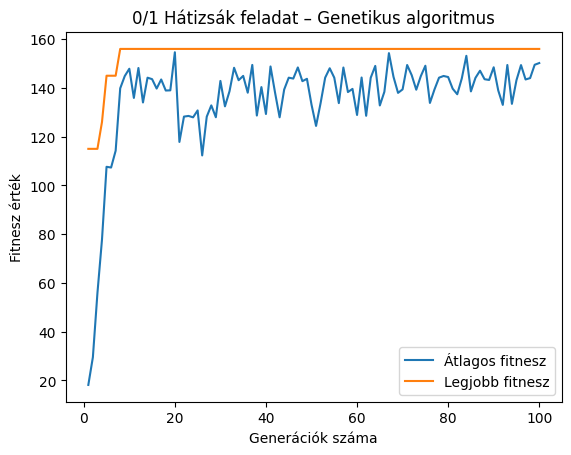

In [37]:
# ===============================================
#  0/1 HÁTIZSÁK FELADAT GENETIKUS ALGORITMUSSAL
# ===============================================

import random
import matplotlib.pyplot as plt

# ---- 1. Probléma beállítása ----
N = 30                                # tárgyak száma
weights = [1 if i % 2 == 0 else 10 for i in range(N)]  # súlyok: 1,10,1,10,...
values  = [10 if i % 2 == 0 else 1  for i in range(N)] # értékek: 10,1,10,1,...
capacity = int(2.5 * N)               # hátizsák kapacitása (75)

# ---- 2. GA paraméterek ----
generations = 100
pop_size = 30
p_cross = 0.9                         # keresztezés valószínűsége
p_mut = 0.01                          # mutáció valószínűsége
elit = 4                              # elit egyedek száma
rnd = random.Random(42)               # véletlenszám-generátor (ismételhető)

# ---- 3. Fitnesz függvény ----
def fitness(x):
    total_weight = sum(w * xi for w, xi in zip(weights, x))
    total_value  = sum(v * xi for v, xi in zip(values, x))
    if total_weight <= capacity:
        return total_value            # érvényes megoldás
    else:
        return 0                      # túl nehéz megoldás – érvénytelen

# ---- 4. Alapműveletek ----
def random_solution():
    return [rnd.randint(0, 1) for _ in range(N)]

def crossover(a, b):
    cp = rnd.randint(1, N - 1)
    return a[:cp] + b[cp:], b[:cp] + a[cp:]

def mutate(x):
    return [1 - xi if rnd.random() < p_mut else xi for xi in x]

def tournament_select(pop, k=2):
    candidates = [rnd.choice(pop) for _ in range(k)]
    return max(candidates, key=lambda ind: ind["fit"])

# ---- 5. Populáció inicializálása ----
pop = [{"x": random_solution()} for _ in range(pop_size)]
for ind in pop:
    ind["fit"] = fitness(ind["x"])

# ---- 6. GA fő ciklus ----
avg_history, best_history = [], []

for g in range(generations):
    fits = [ind["fit"] for ind in pop]
    avg_history.append(sum(fits) / len(fits))
    best_history.append(max(fits))

    # a) elitizmus
    elites = sorted(pop, key=lambda ind: ind["fit"], reverse=True)[:elit]

    # b) új generáció létrehozása
    newpop = []
    while len(newpop) < pop_size - elit:
        p1 = tournament_select(pop)
        p2 = tournament_select(pop)
        if rnd.random() < p_cross:
            c1, c2 = crossover(p1["x"], p2["x"])
        else:
            c1, c2 = p1["x"][:], p2["x"][:]
        c1, c2 = mutate(c1), mutate(c2)
        newpop.append({"x": c1, "fit": fitness(c1)})
        if len(newpop) < pop_size - elit:
            newpop.append({"x": c2, "fit": fitness(c2)})

    # c) elit egyedek visszahelyezése
    pop = newpop + elites

# ---- 7. Eredmény ----
best = max(pop, key=lambda ind: ind["fit"])
best_weight = sum(w * xi for w, xi in zip(weights, best["x"]))
print("Legjobb érték (fitness):", best["fit"])
print("Összsúly:", best_weight, "/", capacity)
print("Megoldás (0/1 vektor):", best["x"])

# ---- 8. Grafikus ábrázolás ----
plt.plot(range(1, generations + 1), avg_history, label="Átlagos fitnesz")
plt.plot(range(1, generations + 1), best_history, label="Legjobb fitnesz")
plt.xlabel("Generációk száma")
plt.ylabel("Fitnesz érték")
plt.title("0/1 Hátizsák feladat – Genetikus algoritmus")
plt.legend()
plt.show()



In [38]:
import random
def fitness(x):
    total_weight = sum([weights[i] * x[i] for i in range(N)])
    total_value  = sum([values[i] * x[i] for i in range(N)])
    if total_weight <= capacity:
        return total_value
    else:
        return 0

def select_parent(population, fitnesses, kivalasztas):
  if kivalasztas == 'random':
    return random.choice(population)
  if kivalasztas == 'harmas_torna':
    tournament_size = 3
    competitors = random.sample(list(zip(population, fitnesses)), tournament_size)
    winner = max(competitors, key=lambda x: x[1])[0]
    return winner
  raise 'Error'

def crossover(p1, p2):
    if random.random() < p_cross:
        point = random.randint(1, N-1)
        child1 = p1[:point] + p2[point:]
        child2 = p2[:point] + p1[point:]
    else:
        child1, child2 = p1[:], p2[:]
    return child1, child2

def mutate(ind, limit = 1):
    for i in range(N):
        if random.random() < p_mut:
            ind[i] = limit - ind[i]
    return ind

def repair(N, weights, ind):
    while True:
        total_weight = sum(weights[i] * ind[i] for i in range(N))
        if total_weight <= capacity:
            return ind

        worst = None
        worst_ratio = float("inf")

        for i in range(N):
            if ind[i] > 0:
                ratio = values[i] / weights[i]
                if ratio < worst_ratio:
                    worst_ratio = ratio
                    worst = i

        ind[worst] -= 1


def run_simulation(N, weights, values, capacity, generations, pop_size, p_cross, p_mut, elit, kivalasztas = 'random', limit = 1):
  population = [repair(N, weights, random.choices(range(0, limit + 1), k=N)) for j in range(pop_size)]
  fitnesses = [fitness(x) for x in population]

  best_fitnesses = []
  avg_fitnesses = []
  best_weights = []
  utilizations = []

  for gen in range(generations):
    sorted_pop = sorted(zip(population, fitnesses), key=lambda x: x[1], reverse=True)
    elites = [ind for ind, fit in sorted_pop[:elit]]

    new_population = elites[:]
    while len(new_population) < pop_size:
        p1 = select_parent(population, fitnesses, kivalasztas)
        p2 = select_parent(population, fitnesses, kivalasztas)

        c1, c2 = crossover(p1, p2)
        c1 = mutate(c1, limit)
        c2 = mutate(c2, limit)
        c1 = repair(N, weights, c1)
        c2 = repair(N, weights, c2)
        new_population.append(c1)
        if len(new_population) < pop_size:
            new_population.append(c2)

    population = new_population
    fitnesses = [fitness(ind) for ind in population]

    best_fitness = max(fitnesses)
    avg_fitness = sum(fitnesses) / len(fitnesses)

    best_fitnesses.append(best_fitness)
    avg_fitnesses.append(avg_fitness)
    best_idx = fitnesses.index(max(fitnesses))
    best = population[best_idx]

    total_weight = sum(weights[i] * best[i] for i in range(len(best)))
    total_value = sum(values[i] * best[i] for i in range(len(best)))
    utilization = 100 * total_weight / capacity

    best_weights.append(total_weight)
    utilizations.append(utilization)

    print(f"Generáció {gen+1}: Legjobb = {best_fitness:.2f}, Átlag = {avg_fitness:.2f}, Felhasználtság: {utilization:.2f}")
  return best_fitnesses, avg_fitnesses, population, fitnesses, best_weights, utilizations

def plot_simulation(best_fitnesses, avg_fitnesses, best_weights, utilizations, population, fitnesses):
    generations = range(1, len(best_fitnesses) + 1)

    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(generations, avg_fitnesses, label="Átlagos fitness", color="blue")
    plt.plot(generations, best_fitnesses, label="Legjobb fitness", color="green")
    plt.xlabel("Generáció")
    plt.ylabel("Fitness érték")
    plt.title("Genetikus algoritmus fejlődése")
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(generations, best_weights, label="Legjobb megoldás súlya", color="orange")
    plt.plot(generations, utilizations, label="Kihasználtság (%)", color="red")
    plt.axhline(y=capacity, color='gray', linestyle='--', linewidth=0.8, label="Kapacitás (súlyhatár)")
    plt.axhline(y=100, color='black', linestyle=':', linewidth=1, label="100% kihasználtság")
    plt.xlabel("Generáció")
    plt.ylabel("Súly / %")
    plt.title("Legjobb megoldás súlya és kihasználtsága")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    best_idx = fitnesses.index(max(fitnesses))
    best = population[best_idx]
    print("\nLegjobb egyed:", best)
    print("Összérték:", fitness(best))
    print("Összsúly:", sum(weights[i]*best[i] for i in range(N)))


Generáció 1: Legjobb = 106.00, Átlag = 77.27, Felhasználtság: 93.33
Generáció 2: Legjobb = 125.00, Átlag = 80.60, Felhasználtság: 82.67
Generáció 3: Legjobb = 125.00, Átlag = 83.23, Felhasználtság: 82.67
Generáció 4: Legjobb = 125.00, Átlag = 92.23, Felhasználtság: 82.67
Generáció 5: Legjobb = 125.00, Átlag = 96.00, Felhasználtság: 82.67
Generáció 6: Legjobb = 145.00, Átlag = 98.80, Felhasználtság: 85.33
Generáció 7: Legjobb = 145.00, Átlag = 107.63, Felhasználtság: 85.33
Generáció 8: Legjobb = 145.00, Átlag = 108.50, Felhasználtság: 85.33
Generáció 9: Legjobb = 146.00, Átlag = 109.47, Felhasználtság: 98.67
Generáció 10: Legjobb = 146.00, Átlag = 115.33, Felhasználtság: 98.67
Generáció 11: Legjobb = 156.00, Átlag = 120.83, Felhasználtság: 100.00
Generáció 12: Legjobb = 156.00, Átlag = 120.80, Felhasználtság: 100.00
Generáció 13: Legjobb = 156.00, Átlag = 124.33, Felhasználtság: 100.00
Generáció 14: Legjobb = 156.00, Átlag = 120.83, Felhasználtság: 100.00
Generáció 15: Legjobb = 156.00,

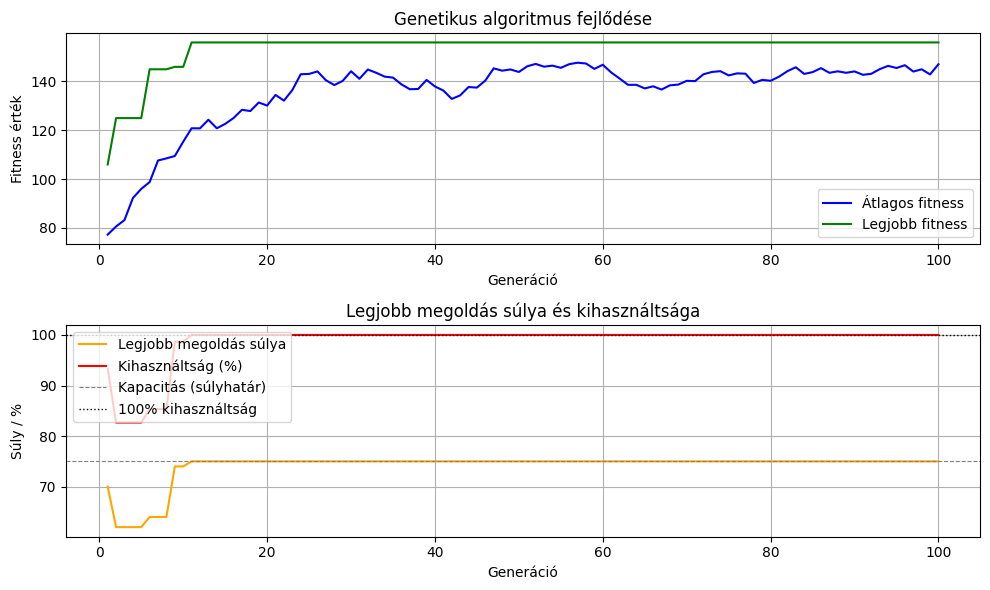


Legjobb egyed: [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0]
Összérték: 156
Összsúly: 75


In [39]:
# hatizsak feladat megoldas 🎒🎒🎒🎒

import matplotlib.pyplot as plt

N = 30
weights = [1 if i % 2 == 0 else 10 for i in range(0, N)]     # páros index: 1, páratlan: 10
values  = [10 if i % 2 == 0 else 1 for i in range(0, N)]     # páros index: 10, páratlan: 1
capacity = 2.5 * N                                           # 75

generations = 100
pop_size = 30
p_cross = 0.9
p_mut = 0.01
elit = 4

def main():
    best_fitnesses, avg_fitnesses, population, fitnesses, best_weights, utilizations = run_simulation(N, weights, values, capacity, generations, pop_size, p_cross, p_mut, elit)
    plot_simulation(best_fitnesses, avg_fitnesses, best_weights, utilizations, population, fitnesses)

if __name__ == "__main__":
    main()

## 1) FELADAT (könnyű) – Eredeti feladat kicsit módosítva


```
* N = 40
* Súlyok: [2, 9, 2, 9, …]
* Értékek: [9, 2, 9, 2, …]
* Kapacitás: 0.45 * sum(weights)
* GA: gen=120, pop=40, pc=0.85, pm=0.015, elit=4
```
Cél: találd meg a legjobb érvényes 0/1 megoldást; hasonlítsd a kihozott értéket a greedy (érték/súly szerint) megoldáshoz.

Generáció 1: Legjobb = 133.00, Átlag = 106.95, Felhasználtság: 98.99
Generáció 2: Legjobb = 149.00, Átlag = 109.97, Felhasználtság: 93.94
Generáció 3: Legjobb = 149.00, Átlag = 108.00, Felhasználtság: 93.94
Generáció 4: Legjobb = 149.00, Átlag = 108.78, Felhasználtság: 93.94
Generáció 5: Legjobb = 149.00, Átlag = 113.70, Felhasználtság: 93.94
Generáció 6: Legjobb = 167.00, Átlag = 117.15, Felhasználtság: 97.98
Generáció 7: Legjobb = 167.00, Átlag = 116.05, Felhasználtság: 97.98
Generáció 8: Legjobb = 167.00, Átlag = 127.10, Felhasználtság: 97.98
Generáció 9: Legjobb = 167.00, Átlag = 128.45, Felhasználtság: 97.98
Generáció 10: Legjobb = 167.00, Átlag = 129.15, Felhasználtság: 97.98
Generáció 11: Legjobb = 167.00, Átlag = 127.72, Felhasználtság: 97.98
Generáció 12: Legjobb = 167.00, Átlag = 128.15, Felhasználtság: 97.98
Generáció 13: Legjobb = 167.00, Átlag = 125.58, Felhasználtság: 97.98
Generáció 14: Legjobb = 167.00, Átlag = 124.65, Felhasználtság: 97.98
Generáció 15: Legjobb = 176.0

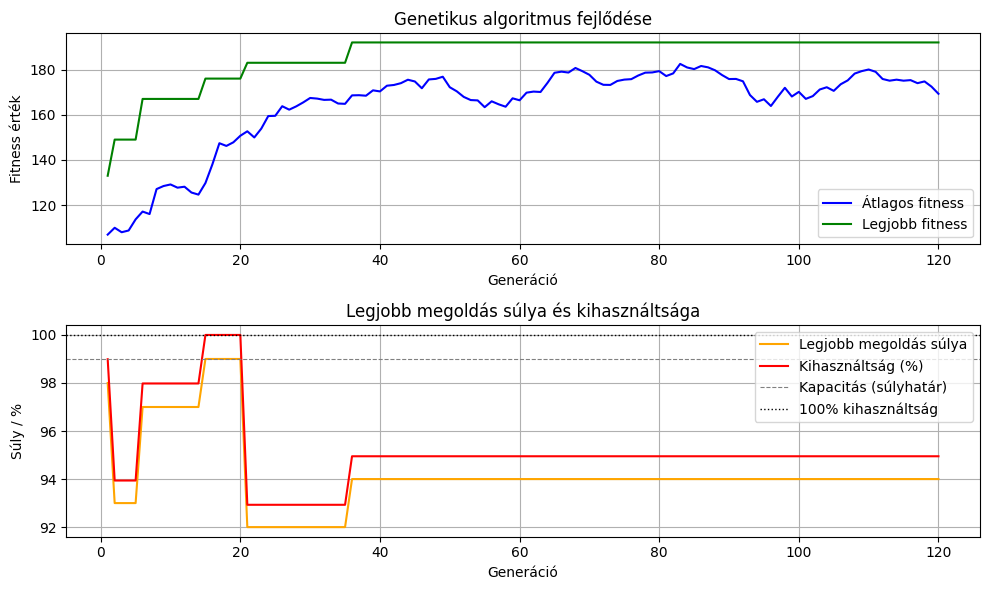


Legjobb egyed: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Összérték: 192
Összsúly: 94
Capacity: 99.0
Greedy weight: 94
Greedy value: 192


In [40]:
N = 40
weights = [2 if i % 2 == 0 else 9 for i in range(0, N)]
values  = [9 if i % 2 == 0 else 2 for i in range(0, N)]
capacity = 0.45 * sum(weights)

generations = 120
pop_size = 40
p_cross = 0.85
p_mut = 0.015
elit = 4

def greedy_megoldas(N, weights, values):
  solution = []
  used_weight = 0
  index = 0
  total_value = 0
  sorted_items = sorted(zip(weights, values), key=lambda x: x[1]/x[0], reverse=True)
  while index < N and used_weight + sorted_items[index][0] < capacity:
    solution.append(sorted_items[index])
    total_value += sorted_items[index][1]
    used_weight += sorted_items[index][0]
    index += 1
  return used_weight, total_value

def main():
    best_fitnesses, avg_fitnesses, population, fitnesses, best_weights, utilizations = run_simulation(N, weights, values, capacity, generations, pop_size, p_cross, p_mut, elit)
    plot_simulation(best_fitnesses, avg_fitnesses, best_weights, utilizations, population, fitnesses)

    greedy_weight, greedy_value = greedy_megoldas(N, weights, values)
    print(f'Capacity: {capacity}')
    print(f'Greedy weight: {greedy_weight}')
    print(f'Greedy value: {greedy_value}')

if __name__ == "__main__":
    main()

## 2) FELADAT (közepes) – Korreltált (realisztikus) feladatfelvetés


```
* N = 60
* Súlyok: véletlen egész [1..15]
* Értékek: values[i] = weights[i] + U(0..5) (kisebb zaj)
* Kapacitás: 0.40 * sum(weights)
* GA: gen=150, pop=60, pc=0.9, pm=0.01, elit=6
```
Cél: vizsgáld meg, nő-e az átlagos fitnesz stabilan; dokumentáld a legjobb megoldás súlyát/értékét és a kihasználtságot (%).

Generáció 1: Legjobb = 296.89, Átlag = 267.21, Felhasználtság: 99.90
Generáció 2: Legjobb = 296.89, Átlag = 262.99, Felhasználtság: 99.90
Generáció 3: Legjobb = 296.89, Átlag = 268.72, Felhasználtság: 99.90
Generáció 4: Legjobb = 297.60, Átlag = 268.99, Felhasználtság: 99.90
Generáció 5: Legjobb = 297.60, Átlag = 267.60, Felhasználtság: 99.90
Generáció 6: Legjobb = 300.48, Átlag = 267.09, Felhasználtság: 99.90
Generáció 7: Legjobb = 300.48, Átlag = 269.06, Felhasználtság: 99.90
Generáció 8: Legjobb = 300.48, Átlag = 269.77, Felhasználtság: 99.90
Generáció 9: Legjobb = 300.48, Átlag = 271.78, Felhasználtság: 99.90
Generáció 10: Legjobb = 301.45, Átlag = 270.74, Felhasználtság: 98.87
Generáció 11: Legjobb = 301.45, Átlag = 267.69, Felhasználtság: 98.87
Generáció 12: Legjobb = 303.54, Átlag = 273.81, Felhasználtság: 99.39
Generáció 13: Legjobb = 303.54, Átlag = 275.38, Felhasználtság: 99.39
Generáció 14: Legjobb = 303.54, Átlag = 279.08, Felhasználtság: 99.39
Generáció 15: Legjobb = 304.1

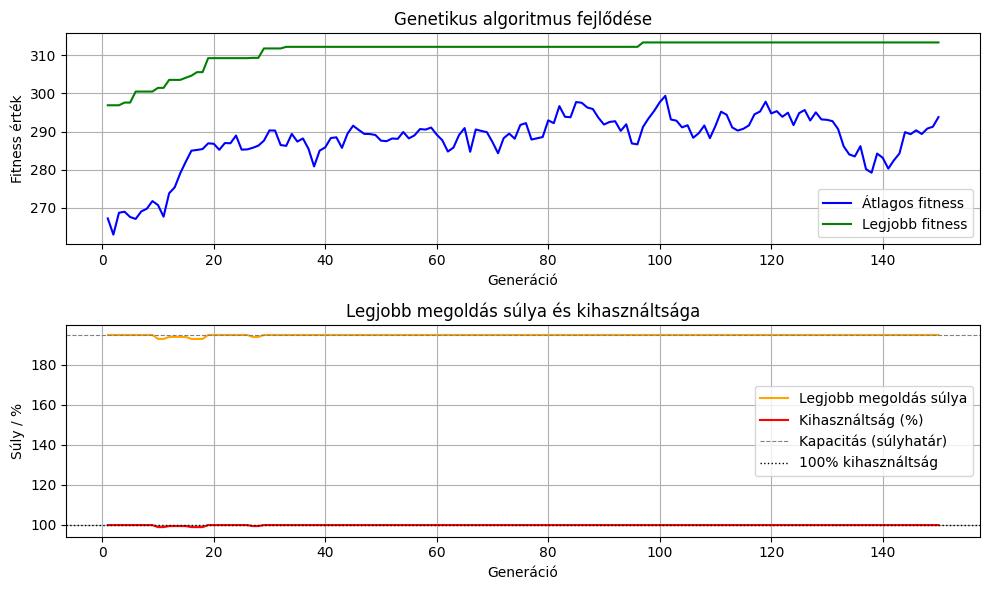


Legjobb egyed: [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
Összérték: 313.3600246820295
Összsúly: 195


In [41]:
N = 60
weights = [random.randint(1, 15) for i in range(0, N)]
values  = [weights[i] + random.random() * 5 for i in range(0, N)]
capacity = 0.40 * sum(weights)

generations = 150
pop_size = 60
p_cross = 0.9
p_mut = 0.01
elit = 6

def main():
    best_fitnesses, avg_fitnesses, population, fitnesses, best_weights, utilizations = run_simulation(N, weights, values, capacity, generations, pop_size, p_cross, p_mut, elit)
    plot_simulation(best_fitnesses, avg_fitnesses, best_weights, utilizations, population, fitnesses)

if __name__ == "__main__":
    main()

## 3) FELADAT (közepes) – „Csapdás” elemek


```
* N = 50
* Súlyok: véletlen [1..12], minden 5. tétel súly=15
* Értékek: véletlen [1..10], minden 5. tétel érték=5 (rossz arány)
* Kapacitás: 0.33 * sum(weights)
* GA: gen=200, pop=50, pc=0.9, pm=0.015, elit=5, kiválasztás: 3-as torna
```
Cél: bizonyítsd, hogy a GA elkerüli a csapdát (5. elemek ritkán legyenek 1-ek a legjobban).

Generáció 1: Legjobb = 158.00, Átlag = 128.62, Felhasználtság: 90.17
Generáció 2: Legjobb = 158.00, Átlag = 139.20, Felhasználtság: 90.17
Generáció 3: Legjobb = 158.00, Átlag = 145.94, Felhasználtság: 90.17
Generáció 4: Legjobb = 160.00, Átlag = 150.92, Felhasználtság: 92.39
Generáció 5: Legjobb = 166.00, Átlag = 153.46, Felhasználtság: 96.82
Generáció 6: Legjobb = 166.00, Átlag = 156.04, Felhasználtság: 96.82
Generáció 7: Legjobb = 167.00, Átlag = 158.58, Felhasználtság: 96.08
Generáció 8: Legjobb = 170.00, Átlag = 160.78, Felhasználtság: 98.30
Generáció 9: Legjobb = 170.00, Átlag = 162.38, Felhasználtság: 98.30
Generáció 10: Legjobb = 171.00, Átlag = 166.22, Felhasználtság: 99.04
Generáció 11: Legjobb = 173.00, Átlag = 166.78, Felhasználtság: 99.78
Generáció 12: Legjobb = 173.00, Átlag = 166.60, Felhasználtság: 99.78
Generáció 13: Legjobb = 173.00, Átlag = 167.92, Felhasználtság: 99.78
Generáció 14: Legjobb = 173.00, Átlag = 170.14, Felhasználtság: 99.78
Generáció 15: Legjobb = 173.0

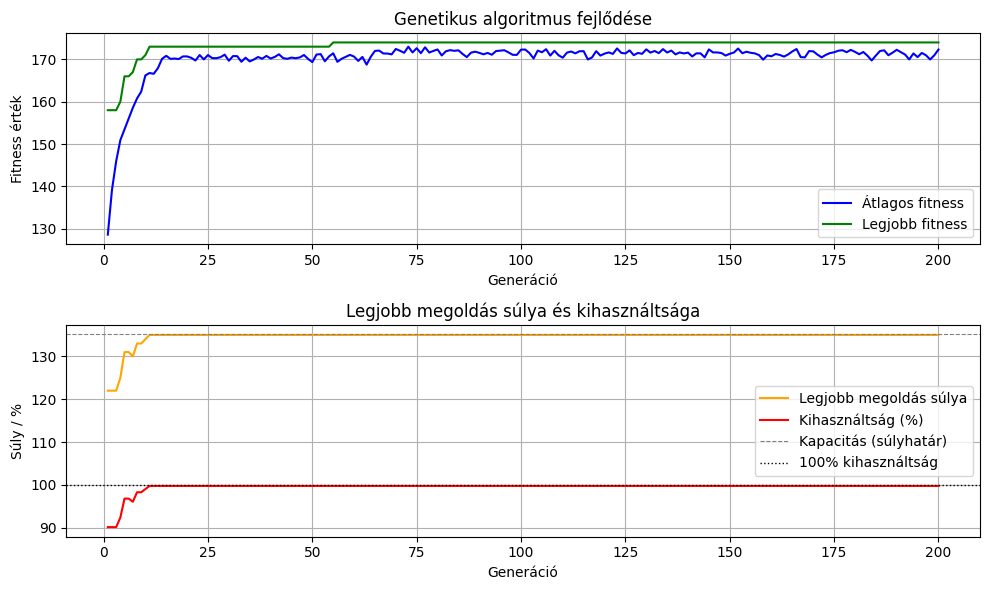


Legjobb egyed: [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]
Összérték: 174
Összsúly: 135
Csapda bitek aránya a legjobb egyedben: 0.00


In [42]:
N = 50
weights = [random.randint(1, 12) if i % 5 != 0 else 15 for i in range(0, N)]
values  = [random.randint(1, 10) if i % 5 != 0 else 5 for i in range(0, N)]
capacity = 0.33 * sum(weights)

generations = 200
pop_size = 50
p_cross = 0.9
p_mut = 0.015
elit = 5

def main():
    best_fitnesses, avg_fitnesses, population, fitnesses, best_weights, utilizations = run_simulation(N, weights, values, capacity, generations, pop_size, p_cross, p_mut, elit, 'harmas_torna')
    plot_simulation(best_fitnesses, avg_fitnesses, best_weights, utilizations, population, fitnesses)
    trap_indices = [i for i in range(N) if i % 5 == 0]
    best_idx = fitnesses.index(max(fitnesses))
    best = population[best_idx]
    trap_ratio = sum(best[i] for i in trap_indices) / len(trap_indices)

    print(f"Csapda bitek aránya a legjobb egyedben: {trap_ratio:.2f}")


if __name__ == "__main__":
    main()

## 4) FELADAT (haladó) – Bounded knapsack (0/1/2 darab)


```
* N = 35
* Súlyok: [1..10] véletlen
* Értékek: [3..20] véletlen
* Kapacitás: 0.50 * sum(weights) (ha mindenből max 1 lenne)
* Döntési változó: x_i ∈ {0,1,2} (kódolás: 2 bit/item vagy egy 0/1/2 gén)
* GA: gen=180, pop=50, pc=0.85, pm=0.02, elit=5
```
Cél: alakítsd át a mutációt/keresztezést, hogy 0/1/2 értékeket kezeljen; használj repair-t, ha túlterhel.

Generáció 1: Legjobb = 357.00, Átlag = 289.94, Felhasználtság: 96.34
Generáció 2: Legjobb = 357.00, Átlag = 296.24, Felhasználtság: 96.34
Generáció 3: Legjobb = 363.00, Átlag = 309.38, Felhasználtság: 98.43
Generáció 4: Legjobb = 369.00, Átlag = 315.28, Felhasználtság: 97.38
Generáció 5: Legjobb = 369.00, Átlag = 314.34, Felhasználtság: 97.38
Generáció 6: Legjobb = 375.00, Átlag = 312.66, Felhasználtság: 99.48
Generáció 7: Legjobb = 375.00, Átlag = 319.20, Felhasználtság: 99.48
Generáció 8: Legjobb = 379.00, Átlag = 320.14, Felhasználtság: 99.48
Generáció 9: Legjobb = 379.00, Átlag = 325.04, Felhasználtság: 99.48
Generáció 10: Legjobb = 381.00, Átlag = 322.04, Felhasználtság: 97.38
Generáció 11: Legjobb = 388.00, Átlag = 326.40, Felhasználtság: 98.43
Generáció 12: Legjobb = 388.00, Átlag = 328.88, Felhasználtság: 98.43
Generáció 13: Legjobb = 388.00, Átlag = 327.42, Felhasználtság: 98.43
Generáció 14: Legjobb = 388.00, Átlag = 326.38, Felhasználtság: 98.43
Generáció 15: Legjobb = 388.0

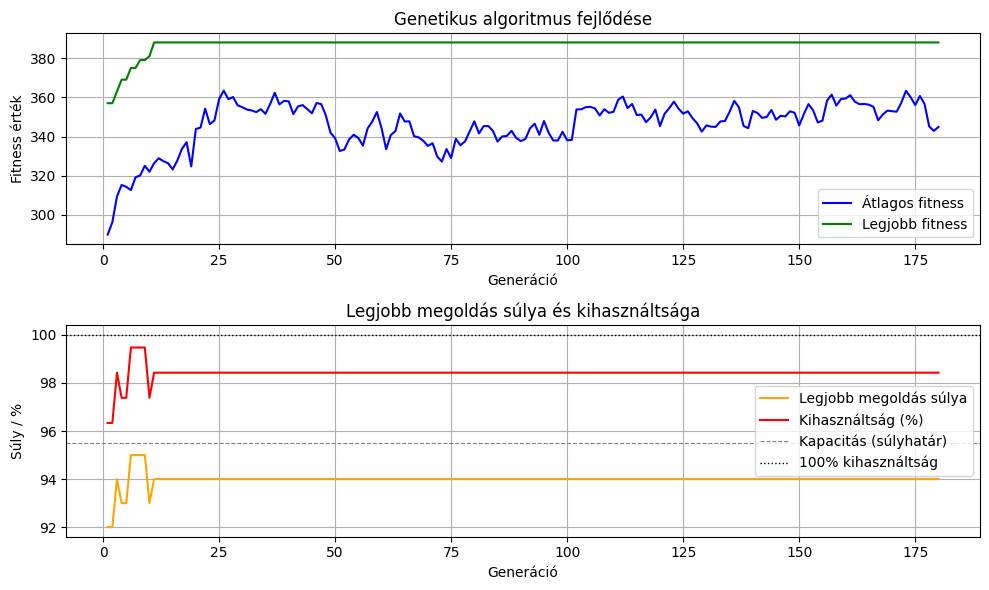


Legjobb egyed: [2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0]
Összérték: 388
Összsúly: 94


In [43]:
N = 35
weights = [random.randint(1, 10) for i in range(0, N)]
values  = [random.randint(3, 20) for i in range(0, N)]
capacity = 0.5 * sum(weights)

generations = 180
pop_size = 50
p_cross = 0.85
p_mut = 0.02
elit = 5

def main():
    best_fitnesses, avg_fitnesses, population, fitnesses, best_weights, utilizations = run_simulation(N, weights, values, capacity, generations, pop_size, p_cross, p_mut, elit, 'random', 2)
    plot_simulation(best_fitnesses, avg_fitnesses, best_weights, utilizations, population, fitnesses)

if __name__ == "__main__":
    main()

## 5) FELADAT (haladó) – 2D knapsack (súly + térfogat)


```
* N = 45
* Súlyok: [2..12], Térfogat: [1..8]
* Értékek: [5..20]
* Kapacitások: sum(weights)*0.45, sum(volumes)*0.50
* GA: gen=220, pop=60, pc=0.9, pm=0.012, elit=6, crossover: kétpontos
```
Cél: módosítsd a fitness-t, hogy mindkét korlátot betartsa (vagy büntesse külön-külön).

In [44]:
import random
def fitness2d(x):
    total_weight = sum([weights[i] * x[i] for i in range(N)])
    total_volume = sum([volumes[i] * x[i] for i in range(N)])
    total_value  = sum([values[i] * x[i] for i in range(N)])
    if total_weight <= capacity and total_volume <= volume_capacity:
        return total_value
    else:
        return 0

def crossover2d(p1, p2):
    if random.random() < p_cross:
        point1 = random.randint(1, N - 2)
        point2 = random.randint(point1 + 1, N - 1)
        child1 = (
            p1[:point1] +
            p2[point1:point2] +
            p1[point2:]
        )
        child2 = (
            p2[:point1] +
            p1[point1:point2] +
            p2[point2:]
        )
    else:
        child1, child2 = p1[:], p2[:]

    return child1, child2


def repair2d(N, weights, volumes, ind):
    while True:
        total_weight = sum(weights[i] * ind[i] for i in range(N))
        total_volume = sum([volumes[i] * ind[i] for i in range(N)])
        if total_weight <= capacity and total_volume <= volume_capacity:
            return ind

        worst = None
        worst_ratio = float("inf")

        for i in range(N):
            if ind[i] > 0:
                ratio = values[i] / weights[i]
                if ratio < worst_ratio:
                    worst_ratio = ratio
                    worst = i
                volume_ratio = values[i] / volumes[i]
                if volume_ratio < worst_ratio:
                  worst_ratio = volume_ratio
                  worst = i

        ind[worst] -= 1


def run_simulation2d(N, weights, volumes, values, capacity, volume_capacity, generations, pop_size, p_cross, p_mut, elit, kivalasztas = 'random', limit = 1):
  population = [repair2d(N, weights, volumes, random.choices(range(0, limit + 1), k=N)) for j in range(pop_size)]
  fitnesses = [fitness2d(x) for x in population]

  best_fitnesses = []
  avg_fitnesses = []
  best_weights = []
  best_volumes = []
  utilizations = []
  volume_utilizations = []

  for gen in range(generations):
    sorted_pop = sorted(zip(population, fitnesses), key=lambda x: x[1], reverse=True)
    elites = [ind for ind, fit in sorted_pop[:elit]]

    new_population = elites[:]
    while len(new_population) < pop_size:
        p1 = select_parent(population, fitnesses, kivalasztas)
        p2 = select_parent(population, fitnesses, kivalasztas)

        c1, c2 = crossover2d(p1, p2)
        c1 = mutate(c1, limit)
        c2 = mutate(c2, limit)
        c1 = repair2d(N, weights, volumes, c1)
        c2 = repair2d(N, weights, volumes, c2)
        new_population.append(c1)
        if len(new_population) < pop_size:
            new_population.append(c2)

    population = new_population
    fitnesses = [fitness2d(ind) for ind in population]

    best_fitness = max(fitnesses)
    avg_fitness = sum(fitnesses) / len(fitnesses)

    best_fitnesses.append(best_fitness)
    avg_fitnesses.append(avg_fitness)
    best_idx = fitnesses.index(max(fitnesses))
    best = population[best_idx]

    total_weight = sum(weights[i] * best[i] for i in range(len(best)))
    total_volume = sum(volumes[i] * best[i] for i in range(len(best)))
    total_value = sum(values[i] * best[i] for i in range(len(best)))
    utilization = 100 * total_weight / capacity
    volume_utilization = 100 * total_volume / volume_capacity

    best_weights.append(total_weight)
    best_volumes.append(total_volume)
    utilizations.append(utilization)
    volume_utilizations.append(volume_utilization)

    print(f"Generáció {gen+1}: Legjobb = {best_fitness:.2f}, Átlag = {avg_fitness:.2f}, Felhasználtság: {utilization:.2f}, {volume_utilization:.2f}")
  return best_fitnesses, avg_fitnesses, population, fitnesses, best_weights, best_volumes, utilizations, volume_utilizations

def plot_simulation2d(best_fitnesses, avg_fitnesses, best_weights, best_volumes, utilizations, volume_utilizations, population, fitnesses):
    generations = range(1, len(best_fitnesses) + 1)

    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(generations, avg_fitnesses, label="Átlagos fitness", color="blue")
    plt.plot(generations, best_fitnesses, label="Legjobb fitness", color="green")
    plt.xlabel("Generáció")
    plt.ylabel("Fitness érték")
    plt.title("Genetikus algoritmus fejlődése")
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(generations, best_weights, label="Legjobb megoldás súlya", color="orange")
    plt.plot(generations, utilizations, label="Kihasználtság (%)", color="red")
    plt.axhline(y=capacity, color='gray', linestyle='--', linewidth=0.8, label="Kapacitás (súlyhatár)")
    plt.axhline(y=100, color='black', linestyle=':', linewidth=1, label="100% kihasználtság")
    plt.xlabel("Generáció")
    plt.ylabel("Súly / %")
    plt.title("Legjobb megoldás súlya és kihasználtsága")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))

    plt.plot(generations, best_volumes, label="Legjobb megoldás térfogata", color="purple")
    plt.plot(generations, volume_utilizations, label="Térfogat kihasználtság (%)", color="brown")
    plt.axhline(y=volume_capacity, color='gray', linestyle='--', linewidth=0.8,
                label="Térfogat kapacitás")
    plt.axhline(y=100, color='black', linestyle=':', linewidth=1,
                label="100% térfogat kihasználtság")

    plt.xlabel("Generáció")
    plt.ylabel("Térfogat / %")
    plt.title("Legjobb megoldás térfogata és térfogat-kihasználtsága")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    best_idx = fitnesses.index(max(fitnesses))
    best = population[best_idx]
    print("\nLegjobb egyed:", best)
    print("Összérték:", fitness(best))
    print("Összsúly:", sum(weights[i]*best[i] for i in range(N)))
    print("Össztérfogat:", sum(volumes[i]*best[i] for i in range(N)))


Generáció 1: Legjobb = 436.00, Átlag = 354.83, Felhasználtság: 99.96, 98.16
Generáció 2: Legjobb = 436.00, Átlag = 353.37, Felhasználtság: 99.96, 98.16
Generáció 3: Legjobb = 436.00, Átlag = 355.42, Felhasználtság: 99.96, 98.16
Generáció 4: Legjobb = 440.00, Átlag = 360.52, Felhasználtság: 98.53, 99.39
Generáció 5: Legjobb = 440.00, Átlag = 368.75, Felhasználtság: 98.53, 99.39
Generáció 6: Legjobb = 443.00, Átlag = 376.38, Felhasználtság: 97.09, 80.98
Generáció 7: Legjobb = 468.00, Átlag = 377.98, Felhasználtság: 94.21, 94.48
Generáció 8: Legjobb = 468.00, Átlag = 383.85, Felhasználtság: 94.21, 94.48
Generáció 9: Legjobb = 468.00, Átlag = 386.07, Felhasználtság: 94.21, 94.48
Generáció 10: Legjobb = 468.00, Átlag = 385.15, Felhasználtság: 94.21, 94.48
Generáció 11: Legjobb = 468.00, Átlag = 379.98, Felhasználtság: 94.21, 94.48
Generáció 12: Legjobb = 468.00, Átlag = 387.33, Felhasználtság: 94.21, 94.48
Generáció 13: Legjobb = 468.00, Átlag = 399.52, Felhasználtság: 94.21, 94.48
Generáci

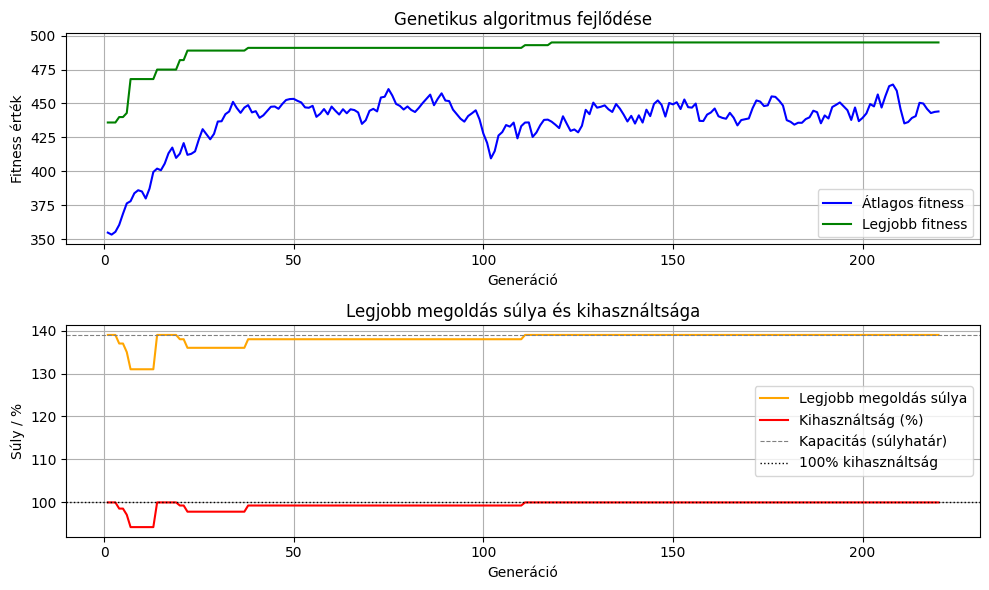

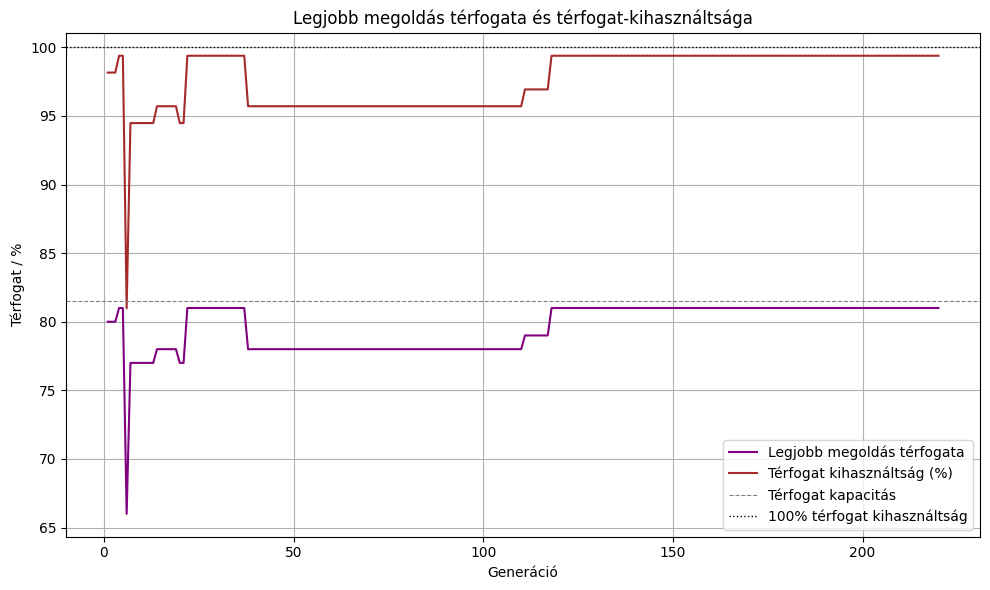


Legjobb egyed: [0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2]
Összérték: 495
Összsúly: 139
Össztérfogat: 81


In [45]:
# * N = 45
# * Súlyok: [2..12], Térfogat: [1..8]
# * Értékek: [5..20]
# * Kapacitások: sum(weights)*0.45, sum(volumes)*0.50
# * GA: gen=220, pop=60, pc=0.9, pm=0.012, elit=6, crossover: kétpontos

N = 45
weights = [random.randint(2, 12) for i in range(0, N)]
volumes = [random.randint(1, 8)  for i in range(0, N)]
values  = [random.randint(5, 20) for i in range(0, N)]
capacity = 0.45 * sum(weights)
volume_capacity = 0.5 * sum(volumes)

generations = 220
pop_size = 60
p_cross = 0.9
p_mut = 0.012
elit = 6

def main():
    best_fitnesses, avg_fitnesses, population, fitnesses, best_weights, best_volumes, utilizations, volume_utilizations = run_simulation2d(N, weights, volumes, values, capacity, volume_capacity, generations, pop_size, p_cross, p_mut, elit, 'random', 2)
    plot_simulation2d(best_fitnesses, avg_fitnesses, best_weights, best_volumes, utilizations, volume_utilizations, population, fitnesses)

if __name__ == "__main__":
    main()

## 6) FELADAT (extra) – „Puha” korlát büntetéssel


```
* N = 50
* Súlyok: [1..10], Értékek: [5..25]
* Kapacitás: 0.4 * sum(weights)
* Fitness: total_value - λ * max(0, total_weight - C) (pl. λ=10..100)
* GA: gen=200, pop=50, pc=0.9, pm=0.01, elit=5, crossover: uniform (p=0.5)
```
Cél: érzékenységi vizsgálat λ-ra (mikor kezdi szisztematikusan elkerülni a túlsúlyt?).

In [46]:
def fitness_extra(x):
    total_weight = sum([weights[i] * x[i] for i in range(N)])
    total_value  = sum([values[i] * x[i] for i in range(N)])
    return total_value - _lambda * max(0, total_weight - capacity)

def crossover_extra(p1, p2):
    child1 = []
    child2 = []
    for i in range(0, len(p1)):
      if random.random() < 0.5:
        child1.append(p1[i])
        child2.append(p2[i])
      else:
        child1.append(p2[i])
        child2.append(p1[i])
    return child1, child2

def run_simulation_extra(N, weights, values, capacity, generations, pop_size, p_cross, p_mut, elit, kivalasztas = 'random', limit = 1):
  population = [random.choices(range(0, limit + 1), k=N) for j in range(pop_size)]
  fitnesses = [fitness_extra(x) for x in population]

  best_fitnesses = []
  avg_fitnesses = []
  best_weights = []
  utilizations = []

  for gen in range(generations):
    sorted_pop = sorted(zip(population, fitnesses), key=lambda x: x[1], reverse=True)
    elites = [ind for ind, fit in sorted_pop[:elit]]

    new_population = elites[:]
    while len(new_population) < pop_size:
        p1 = select_parent(population, fitnesses, kivalasztas)
        p2 = select_parent(population, fitnesses, kivalasztas)

        c1, c2 = crossover_extra(p1, p2)
        c1 = mutate(c1, limit)
        c2 = mutate(c2, limit)
        new_population.append(c1)
        if len(new_population) < pop_size:
            new_population.append(c2)

    population = new_population
    fitnesses = [fitness_extra(ind) for ind in population]

    best_fitness = max(fitnesses)
    avg_fitness = sum(fitnesses) / len(fitnesses)

    best_fitnesses.append(best_fitness)
    avg_fitnesses.append(avg_fitness)
    best_idx = fitnesses.index(max(fitnesses))
    best = population[best_idx]

    total_weight = sum(weights[i] * best[i] for i in range(len(best)))
    total_value = sum(values[i] * best[i] for i in range(len(best)))
    utilization = 100 * total_weight / capacity

    best_weights.append(total_weight)
    utilizations.append(utilization)
  return best_fitnesses, avg_fitnesses, population, fitnesses, best_weights, utilizations

def plot_simulation_extra(best_fitnesses, avg_fitnesses, best_weights, utilizations, population, fitnesses):
    generations = range(1, len(best_fitnesses) + 1)

    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(generations, avg_fitnesses, label="Átlagos fitness", color="blue")
    plt.plot(generations, best_fitnesses, label="Legjobb fitness", color="green")
    plt.plot(generations, best_weights, label="Legjobb megoldás súlya", color="orange")
    plt.axhline(y=capacity, color='gray', linestyle='--', linewidth=0.8, label="Kapacitás (súlyhatár)")
    plt.xlabel("Generáció")
    plt.ylabel("Fitness érték")
    plt.title(f"Genetikus algoritmus fejlődése ({_lambda})")
    plt.legend()
    plt.grid(True)

    best_idx = fitnesses.index(max(fitnesses))
    best = population[best_idx]
    print("\nLegjobb egyed:", best)
    print("Összérték:", fitness_extra(best))
    print("Összsúly:", sum(weights[i]*best[i] for i in range(N)), " / ", capacity)



Legjobb egyed: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Összérték: 630.6
Összsúly: 236  /  101.60000000000001

Legjobb egyed: [1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1]
Összérték: 503
Összsúly: 101  /  101.60000000000001

Legjobb egyed: [1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1]
Összérték: 504
Összsúly: 101  /  101.60000000000001

Legjobb egyed: [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1]
Összérték: 498
Összsúly: 101  /  101.60000000000001


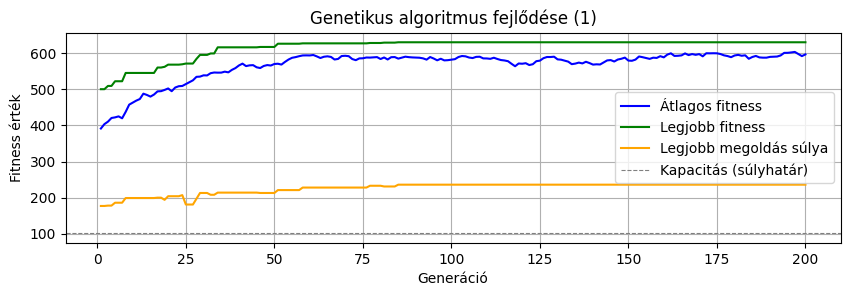

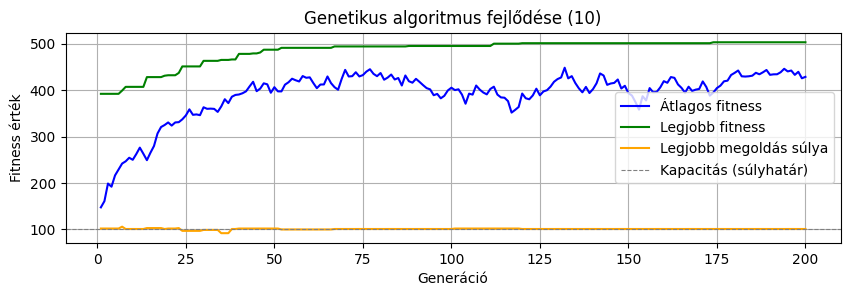

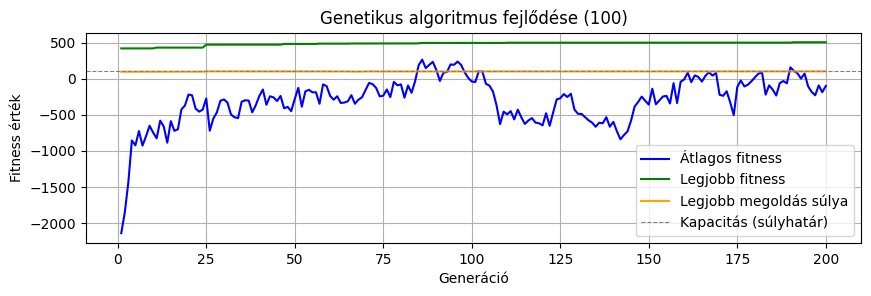

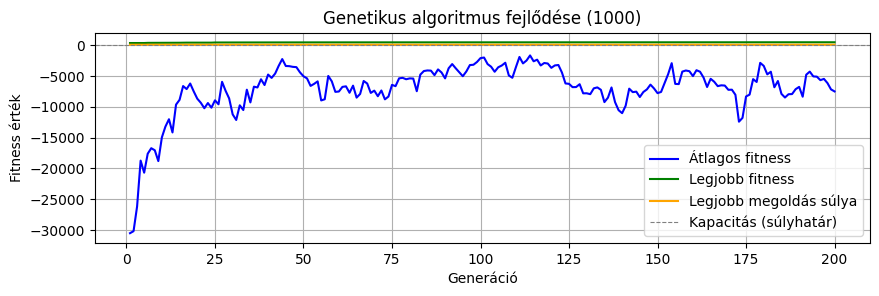

In [47]:
N = 50
weights = [random.randint(1, 10) for i in range(0, N)]
values  = [random.randint(5, 25) for i in range(0, N)]
capacity = 0.4 * sum(weights)

generations = 200
pop_size = 50
p_cross = 0.9
p_mut = 0.01
elit = 5

def main():
  for i in [1, 10, 100, 1000]:
    global _lambda
    _lambda = i
    best_fitnesses, avg_fitnesses, population, fitnesses, best_weights, utilizations = run_simulation_extra(N, weights, values, capacity, generations, pop_size, p_cross, p_mut, elit)
    plot_simulation_extra(best_fitnesses, avg_fitnesses, best_weights, utilizations, population, fitnesses)

if __name__ == "__main__":
    main()

Ellenőrző feladatok:
* Írd le, milyen kromoszóma-kódolást használsz (0/1, 0/1/2, többdimenziós).
* Mutasd meg 3 futás átlagát és szórását (más random seed).
* Készíts érzékenységi vizsgálatot: pm ∈ {0.005, 0.01, 0.02}, pc ∈ {0.8, 0.9}, elit ∈ {2,4,6}.
* Hasonlíts a greedy heurisztikához és írd le, mikor gyengébb/erősebb a GA.
* (2D/penalty) Rajzold meg, hogyan változik a legjobb megoldás a kapacitás növelésével (C-sweep).